In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters as hp
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout



import warnings
warnings.filterwarnings('ignore')

/var/folders/xt/sl7zzj0d22bf4c7qn3fbgdpw0000gn/T/ipykernel_1342/3770603203.py:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [5]:
df.describe(include='object')

,Acidity,Quality
count,4001,4000
unique,4001,2
top,-0.491590483,good
freq,1,2004


In [6]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

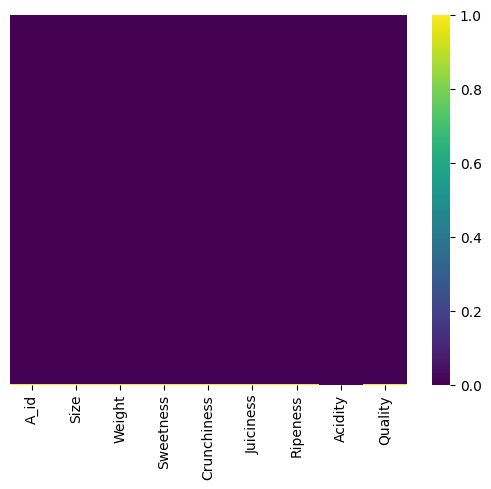

In [7]:
sns.heatmap(df.isna(),yticklabels=False, cmap='viridis')
plt.show()

In [8]:
df['Acidity'].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-2.229719806',
       '1.599796456', 'Created_by_Nidula_Elgiriyewithana'], dtype=object)

In [9]:
df[df.Acidity == 'Created_by_Nidula_Elgiriyewithana']

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [10]:
df[df.Acidity != 'Created_by_Nidula_Elgiriyewithana'].count()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality        4000
dtype: int64

In [11]:
df = df[df.Acidity != 'Created_by_Nidula_Elgiriyewithana']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [12]:
def missing_values_summary(df):
    missing_data = df.isnull().sum()
    total_rows = len(df)

    missing_data_percentage = (missing_data/total_rows)*100

    missing_data_summary = pd.DataFrame({
        'Feature': missing_data.index,
        'Missing Values' : missing_data.values,
        'Percentage' : missing_data_percentage.values
    })

    missing_data_summary = missing_data_summary.sort_values(by='Percentage', ascending=False)

    return missing_data_summary

In [13]:
missing_values_summary(df)

,Feature,Missing Values,Percentage
0,A_id,0,0.0
1,Size,0,0.0
2,Weight,0,0.0
3,Sweetness,0,0.0
4,Crunchiness,0,0.0
5,Juiciness,0,0.0
6,Ripeness,0,0.0
7,Acidity,0,0.0
8,Quality,0,0.0


In [14]:
df['Acidity'] = df['Acidity'].astype('float64')
df = df.drop(['A_id'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Size
Skewness: -0.0024360294426308085


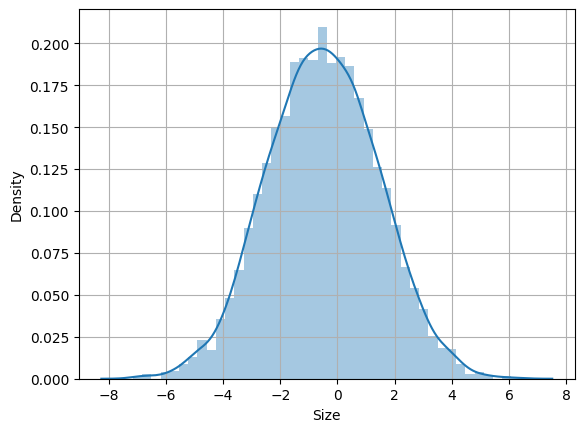

Weight
Skewness: 0.0031004069327457127


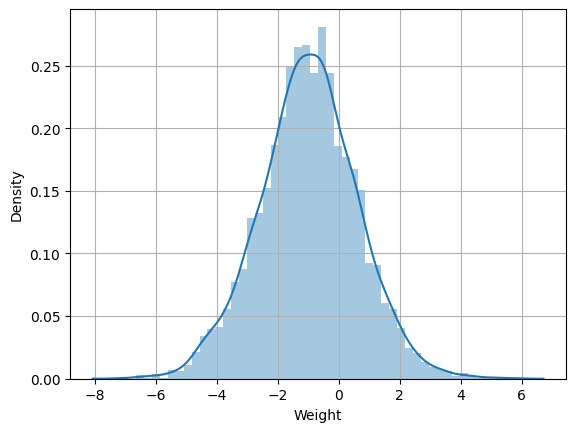

Sweetness
Skewness: 0.08381834394973907


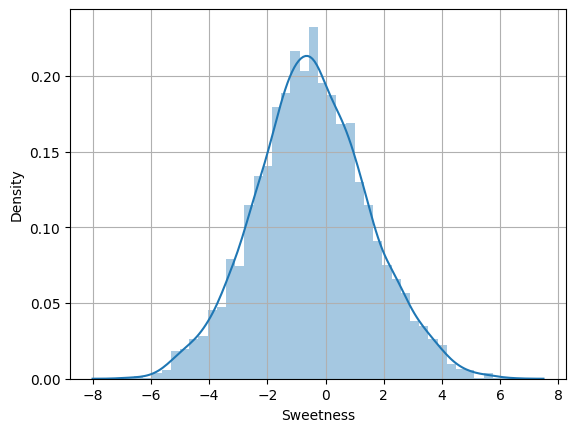

Crunchiness
Skewness: 0.00023001961531377834


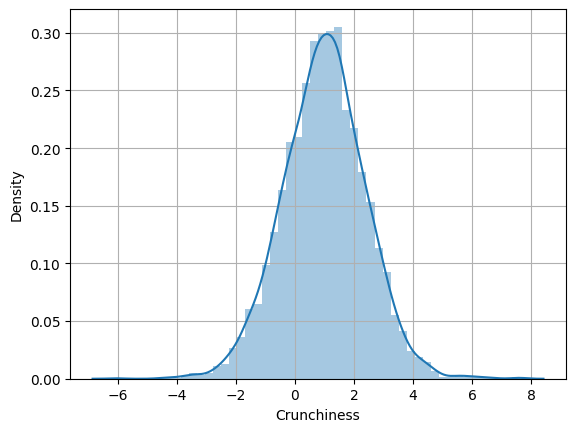

Juiciness
Skewness: -0.11337829624193697


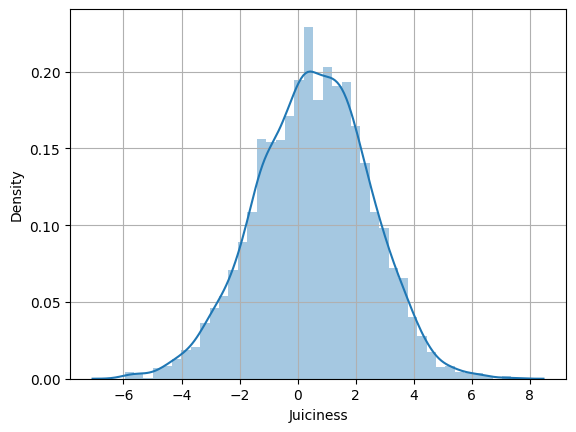

Ripeness
Skewness: -0.008760810490611875


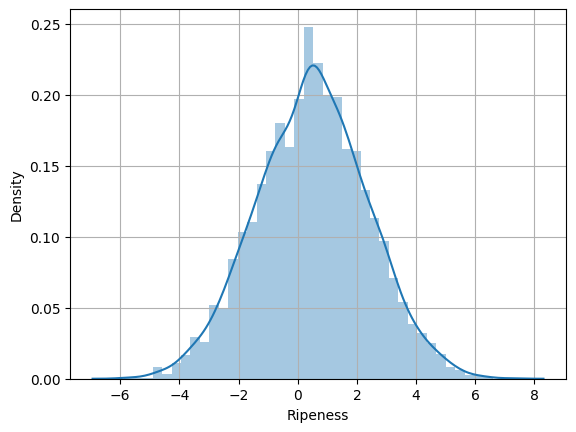

Acidity
Skewness: 0.055762532378246056


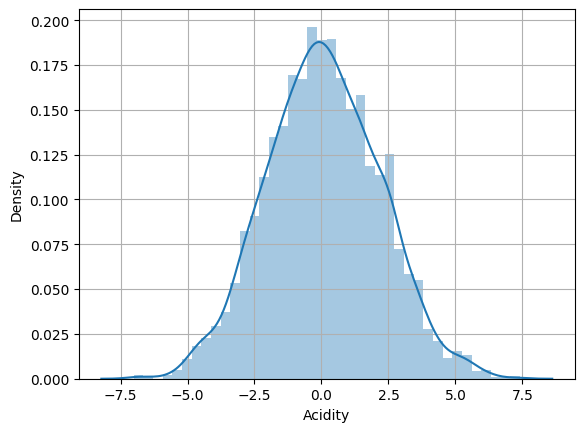

In [16]:
one = df.select_dtypes(['float64'])

for col in one:
    print(col)
    print(f'Skewness: {skew(one[col])}')

    plt.figure()
    sns.distplot(one[col])
    plt.grid(True)
    plt.show()

In [17]:
one.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


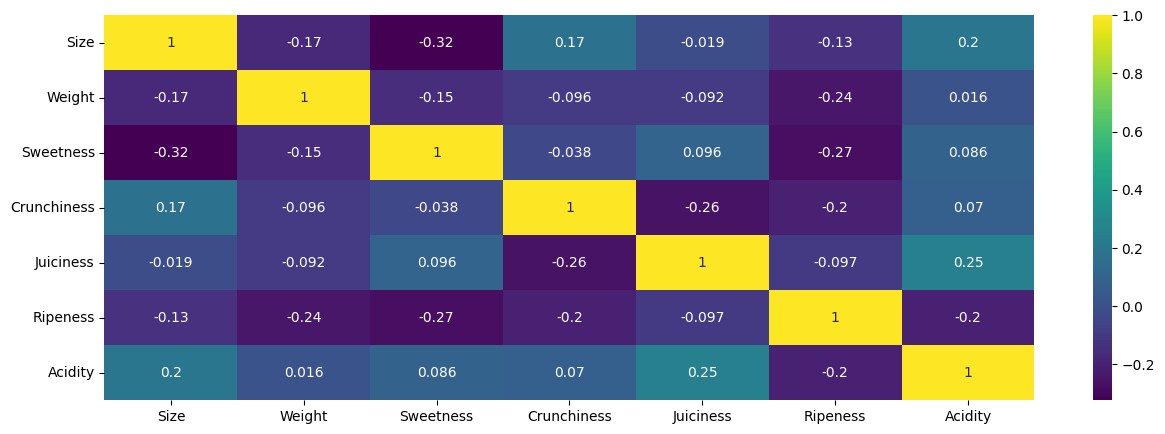

In [18]:
plt.figure(figsize = (15,5))
sns.heatmap(one.corr(), annot= True, cmap = 'viridis')
plt.show()

In [19]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [20]:
x = df.iloc[: , :-1]
y = df.iloc[ : ,-1]

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [22]:
print(f'Xtrain: {xtrain.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (2800, 7)
Ytrain: (2800,)
Xtest: (1200, 7)
Ytest: (1200,)


In [23]:
ytrain.head()

3215    good
3126     bad
697     good
3613    good
2374    good
Name: Quality, dtype: object

In [24]:
ytrain.shape

(2800,)

In [25]:
ytrain_reshaped = np.array(ytrain).reshape(-1,1)

oe = OrdinalEncoder()
ytrain_encoded = oe.fit_transform(ytrain_reshaped)

In [26]:
ytrain = ytrain_encoded.flatten()

In [27]:
ytest_reshaped = np.array(ytest).reshape(-1,1)

oe = OrdinalEncoder()
ytest_encoded = oe.fit_transform(ytest_reshaped)
ytest = ytest_encoded.flatten()

In [28]:
print(xtrain.shape)
print(xtest.shape)

(2800, 7)
(1200, 7)


In [29]:
xtrain.columns



Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [30]:
columns_to_scale = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
standard_scaler = StandardScaler()

xtrain_scaled_array = standard_scaler.fit_transform(xtrain[columns_to_scale])
xtrain = pd.DataFrame(xtrain_scaled_array, columns=columns_to_scale, index=xtrain.index)

xtest_scaled_array = standard_scaler.transform(xtest[columns_to_scale])
xtest = pd.DataFrame(xtest_scaled_array, columns=columns_to_scale, index=xtest.index)

In [31]:
xtrain.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3215,1.078633,-1.268430,-0.341128,-0.841490,1.319372,-0.459025,0.764257
3126,1.653148,1.171527,-0.288417,0.906704,-0.425436,-1.631345,0.253126
697,-0.313366,0.583272,0.674861,-0.758873,1.061875,-0.570322,-1.847651
3613,-0.461331,1.149011,-0.883749,0.053613,-0.358952,0.518206,-0.463853
2374,0.520137,-0.541318,0.958719,-1.066084,-0.793963,-0.802577,0.646980


In [32]:
xtest.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,1.869743,-0.447096,-1.648822,-0.010996,0.006006,0.627433,-0.305611
3491,1.007982,0.470353,0.204465,0.310870,0.184535,-1.426487,0.882310
527,0.886996,0.292185,1.125319,0.230820,-0.556106,-0.968045,0.433489
3925,-0.576701,-0.361532,1.388648,-0.812737,-1.008010,1.015967,-0.278279
2989,-0.758866,0.293447,-0.987787,-0.603996,-1.698553,0.608051,-0.824862


In [33]:
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size = 0.5, random_state= 42)

In [34]:
print(f'Xtrain: {xtrain.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytest: {ytest.shape}')
print(f'Xval: {xval.shape}')
print(f'Yval: {yval.shape}')

Xtrain: (2800, 7)
Ytrain: (2800,)
Xtest: (600, 7)
Ytest: (600,)
Xval: (600, 7)
Yval: (600,)


In [35]:
xtrain.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3215,1.078633,-1.268430,-0.341128,-0.841490,1.319372,-0.459025,0.764257
3126,1.653148,1.171527,-0.288417,0.906704,-0.425436,-1.631345,0.253126
697,-0.313366,0.583272,0.674861,-0.758873,1.061875,-0.570322,-1.847651
3613,-0.461331,1.149011,-0.883749,0.053613,-0.358952,0.518206,-0.463853
2374,0.520137,-0.541318,0.958719,-1.066084,-0.793963,-0.802577,0.646980


In [36]:
xval.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3453,1.528657,-0.282537,0.237962,0.038691,-0.810269,1.290415,-0.953247
511,1.731917,-0.045427,-0.649516,0.512682,-0.294992,0.110345,1.636228
14,1.734826,0.394822,-0.286451,-0.060466,-0.938250,0.052770,0.766698
3930,-1.509775,0.973009,1.553866,-1.728065,-0.502269,0.197669,-1.534713
1344,-0.413772,-0.471838,0.137963,0.256857,-1.438879,-1.190523,-1.625622


In [37]:
xtest.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
2659,-0.508144,0.406108,-0.508381,-0.057904,0.434885,0.148754,0.535242
3800,-0.930259,1.720949,-0.354025,0.234274,0.488709,-0.196445,-0.715754
2515,1.415661,-0.792099,0.678922,0.066317,0.473998,-1.040920,1.191585
3493,0.235048,-1.685813,2.626417,-0.054535,-0.462072,0.944966,0.564375
3224,-1.424689,0.763556,1.151177,-0.687783,1.141689,-0.473461,-0.871196


In [38]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for name, clf in classifiers.items():
    clf.fit(xtrain, ytrain)

    yval_pred = clf.predict(xval)
    
    # Evaluate performance
    accuracy = accuracy_score(yval, yval_pred)
    precision = precision_score(yval, yval_pred)
    recall = recall_score(yval, yval_pred)
    f1 = f1_score(yval, yval_pred)
    mcc = matthews_corrcoef(yval, yval_pred)
    
    # Print performance metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")
    print()


Classifier: Random Forest
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
MCC: 0.77

Classifier: Logistic Regression
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
MCC: 0.51

Classifier: Support Vector Machine
Accuracy: 0.90
Precision: 0.90
Recall: 0.91
F1 Score: 0.91
MCC: 0.81



In [39]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-Layer Perceptron": MLPClassifier()
}

for name, clf in classifiers.items():
    clf.fit(xtrain, ytrain)

    yval_pred = clf.predict(xval)
    
    # Evaluate performance
    accuracy = accuracy_score(yval, yval_pred)
    precision = precision_score(yval, yval_pred)
    recall = recall_score(yval, yval_pred)
    f1 = f1_score(yval, yval_pred)
    mcc = matthews_corrcoef(yval, yval_pred)
    
    # Print performance metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")
    print()

Classifier: K-Nearest Neighbors
Accuracy: 0.90
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
MCC: 0.79

Classifier: Decision Tree
Accuracy: 0.78
Precision: 0.79
Recall: 0.77
F1 Score: 0.78
MCC: 0.56

Classifier: Naive Bayes
Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1 Score: 0.76
MCC: 0.53

Classifier: Multi-Layer Perceptron
Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1 Score: 0.93
MCC: 0.85



In [40]:
tf.random.set_seed(42)

fnn1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'relu'),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid')
])

fnn1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.legacy.Adam(),
    metrics=['accuracy']
)

fnn1_fitting = fnn1.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50


2024-02-16 13:29:40.121675: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


88/88 [==============================] - 0s 361us/step - loss: 0.7424 - accuracy: 0.4775
Epoch 2/50
88/88 [==============================] - 0s 289us/step - loss: 0.6880 - accuracy: 0.5586
Epoch 3/50
88/88 [==============================] - 0s 286us/step - loss: 0.6567 - accuracy: 0.6082
Epoch 4/50
88/88 [==============================] - 0s 285us/step - loss: 0.6315 - accuracy: 0.6389
Epoch 5/50
88/88 [==============================] - 0s 284us/step - loss: 0.6079 - accuracy: 0.6604
Epoch 6/50
88/88 [==============================] - 0s 284us/step - loss: 0.5836 - accuracy: 0.6789
Epoch 7/50
88/88 [==============================] - 0s 283us/step - loss: 0.5531 - accuracy: 0.7100
Epoch 8/50
88/88 [==============================] - 0s 288us/step - loss: 0.5132 - accuracy: 0.7496
Epoch 9/50
88/88 [==============================] - 0s 293us/step - loss: 0.4772 - accuracy: 0.7632
Epoch 10/50
88/88 [==============================] - 0s 289us/step - loss: 0.4517 - accuracy: 0.7807
Epoch 11/5

In [41]:
loss, accuracy = fnn1.evaluate(xval, yval)
print(f'Model loss on the validation set is : {loss}')
print(f'Model accuracy on the validation set is : {accuracy}')

19/19 [==============================] - 0s 344us/step - loss: 0.3500 - accuracy: 0.8483
Model loss on the validation set is : 0.349950909614563
Model accuracy on the validation set is : 0.8483333587646484


In [42]:

def build_model(hp):
    model = keras.Sequential()

    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,
                                            max_value=50,
                                            step=5),
                               activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  
    max_trials=5,  
    executions_per_trial=1,  
    directory='keras_tuner_logs',  
    project_name='binary_classification')  

tuner.search(xtrain, ytrain, epochs=100, validation_data=(xval, yval))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps.values['epochs'] = 100 

best_model = tuner.hypermodel.build(best_hps)

best_model.fit(xtrain, ytrain, epochs=best_hps.values['epochs'], validation_data=(xval, yval))

best_model.evaluate(xval, yval)


Reloading Tuner from keras_tuner_logs/binary_classification/tuner0.json
Epoch 1/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8061 - val_loss: 0.3150 - val_accuracy: 0.8700
Epoch 2/100
88/88 [==============================] - 0s 479us/step - loss: 0.3053 - accuracy: 0.8636 - val_loss: 0.2977 - val_accuracy: 0.8850
Epoch 3/100
88/88 [==============================] - 0s 487us/step - loss: 0.2790 - accuracy: 0.8807 - val_loss: 0.2836 - val_accuracy: 0.8783
Epoch 4/100
88/88 [==============================] - 0s 481us/step - loss: 0.2584 - accuracy: 0.8882 - val_loss: 0.2956 - val_accuracy: 0.8967
Epoch 5/100
88/88 [==============================] - 0s 482us/step - loss: 0.2458 - accuracy: 0.8893 - val_loss: 0.2631 - val_accuracy: 0.9000
Epoch 6/100
88/88 [==============================] - 0s 476us/step - loss: 0.2337 - accuracy: 0.9007 - val_loss: 0.2590 - val_accuracy: 0.9117
Epoch 7/100
88/88 [==============================] - 0s 455us/step - los

[0.45538854598999023, 0.9233333468437195]

In [43]:
def build_model(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,
                                            max_value=50,
                                            step=5),
                               activation='relu'))
        model.add(Dropout(rate=0.2))

    model.add(layers.Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy', 
    max_trials=5,  
    executions_per_trial=1,  
    directory='keras_tuner_logs',  
    project_name='binary_classification') 

tuner.search(xtrain, ytrain, epochs=100, validation_data=(xval, yval), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

fnn2 = tuner.hypermodel.build(best_hps)

history = fnn2.fit(xtrain, ytrain, epochs=100, validation_data=(xval, yval), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

fnn2.evaluate(xval, yval)


Reloading Tuner from keras_tuner_logs/binary_classification/tuner0.json


Epoch 1/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7586 - val_loss: 0.3387 - val_accuracy: 0.8550
Epoch 2/100
88/88 [==============================] - 0s 505us/step - loss: 0.4020 - accuracy: 0.8236 - val_loss: 0.3219 - val_accuracy: 0.8667
Epoch 3/100
88/88 [==============================] - 0s 489us/step - loss: 0.3499 - accuracy: 0.8500 - val_loss: 0.3259 - val_accuracy: 0.8633
Epoch 4/100
88/88 [==============================] - 0s 499us/step - loss: 0.3531 - accuracy: 0.8457 - val_loss: 0.3051 - val_accuracy: 0.8750
Epoch 5/100
88/88 [==============================] - 0s 496us/step - loss: 0.3362 - accuracy: 0.8554 - val_loss: 0.3100 - val_accuracy: 0.8783
Epoch 6/100
88/88 [==============================] - 0s 504us/step - loss: 0.3359 - accuracy: 0.8579 - val_loss: 0.3141 - val_accuracy: 0.8850
Epoch 7/100
88/88 [==============================] - 0s 514us/step - loss: 0.3218 - accuracy: 0.8668 - val_loss: 0.3282 - val_accuracy: 0.8817
E

[0.2690736651420593, 0.92166668176651]

In [44]:
loss, accuracy = fnn2.evaluate(xtest, ytest)
print(f'Model loss on Test set: {loss}')
print(f'Model accuracy on Test set: {accuracy}')

19/19 [==============================] - 0s 353us/step - loss: 0.2814 - accuracy: 0.8967
Model loss on Test set: 0.2814432382583618
Model accuracy on Test set: 0.8966666460037231
